# Колебания маятника с затуханием
### В данном ноутбуке рассматриваются свободные колебания маятника (при отсутствии внешних сил) при наличии трения. Используются библиотеки NumPy, SciPy, Matplotlib.
* ### Уравнение движения имеет вид: 
## $\ddot{\theta}+\omega_0^2 sin(\theta)+2\delta\dot{\theta}=0$,
### где $\theta$ - угол отклонения маятника от вертикали, $\omega_0^2=\frac{g}{l}$ - собственная (циклическая) частота, $\delta$ - коэффициент затухания
### Документация [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)
#### Обозначение: $\dot{\theta}=\frac{d\theta}{dt}$, $\ddot{\theta}=\frac{d^2\theta}{dt^2}$

* ### Уравнение гармонического осциллятора:
### $\ddot{x}+\omega_0^2 x=0$
* ### Список литературы:
    1. #### В. В. Мигулин, "Основы теории колебаний"
    2. #### Методичка [раз](https://mipt.ru/education/chair/physics/S_I/method/Meh_col.pdf)
    3. #### Методичка [два](http://butikov.faculty.ifmo.ru/Applets/manlr_1.pdf)

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) # Для изменения размера шрифта на графиках

In [2]:
# Длина маятника
l = 2
# Ускорение свободного падения
g = 9.8
# Коэффициент затухания
delta = 0.5
# Собственная частота
omega_0 = np.sqrt(g/l)
# Начальное угол и угловая скорость
theta_0 = np.pi-0.1
ang_vel_0 = 0

### Изобразим начальное положение маятника

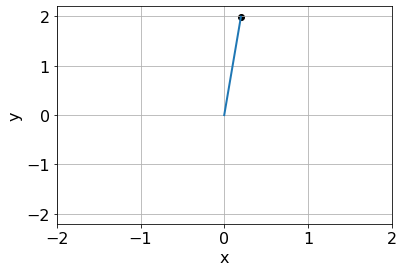

In [3]:
plt.plot([0, l*np.sin(theta_0)], [0, -l*np.cos(theta_0)], lw=2)
plt.scatter(l*np.sin(theta_0), -l*np.cos(theta_0), color='k')

plt.xlim([-2, 2])
plt.ylim([-2.2, 2.2])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

In [4]:
# Инициализируем функцию для последующего решения в odeint
def f(y, t, omega_0, delta):
    theta, ang_vel = y
    dydt = [ang_vel,
           -omega_0**2 * np.sin(theta)-2*delta*ang_vel]
    return dydt

# Время моделирования и начальные условия
t = np.arange(0, 20, 0.01)
y0 = [theta_0, ang_vel_0]

# В solution хранятся вектора ответов
solution = odeint(f, y0, t, args=(omega_0, delta)).T

In [5]:
solution.shape

(2, 2000)

In [6]:
[theta, ang_vel] = solution[0, :], solution[1, :]

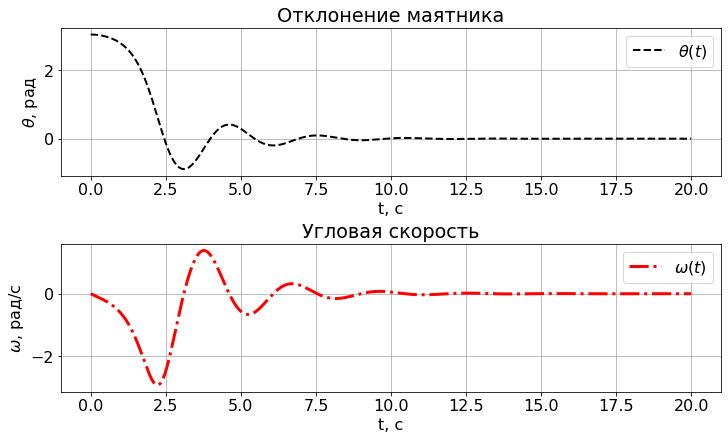

In [7]:
fig, ax = plt.subplots(2, figsize=(10, 6), constrained_layout=True)
ax[0].plot(t, theta, 'k--', lw=2, label='$\\theta(t)$')
ax[1].plot(t, ang_vel, 'r-.', lw=3, label='$\\omega(t)$')

ax[0].set_xlabel('t, с')
ax[0].set_ylabel('$\\theta$, рад')
ax[0].set_title('Отклонение маятника')
ax[0].grid(True)

ax[1].set_xlabel('t, с')
ax[1].set_ylabel('$\\omega$, рад/с')
ax[1].set_title('Угловая скорость')
ax[1].grid(True)

ax[0].legend()
ax[1].legend()

### Изобразим положение маятника в последний момент времени

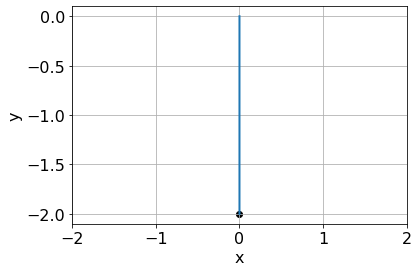

In [8]:
plt.plot([0, l*np.sin(theta[-1])], [0, -l*np.cos(theta[-1])], lw=2)
plt.scatter(l*np.sin(theta[-1]), -l*np.cos(theta[-1]), color='k')

plt.xlim([-2, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

### Построим фазовый портрет системы

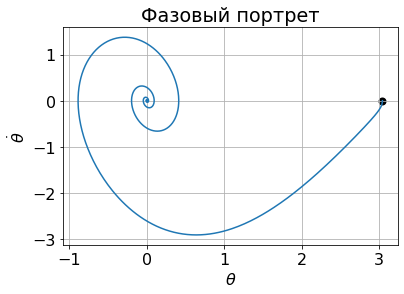

In [9]:
plt.plot(theta, ang_vel)
plt.xlabel('$\\theta$')
plt.ylabel('$\dot{\\theta}$')
plt.title('Фазовый портрет')
plt.grid()
# Начальная состояние системы
plt.scatter(theta[0], ang_vel[0], color='k', lw=2)